In [1]:
import datetime
from pathlib import Path
import isodate

from gribscan_harmonie.load import create_loader

/nwp/lcd/tools/gribscan-harmonie/.venv/lib/python3.10/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.24.2
  warnings.warn(


In [2]:
FILEPATH_ROOT = "/dmidata/cache/mdc{partition}/gdb/grib2/dini/"
FILEPATH_SUFFIX_FORMAT = "{data_kind}/{analysis_time:%Y%m%d%H}"
FILENAME_FORMAT = "{forecast_hour:03d}"
FORECAST_RESOLUTION = datetime.timedelta(hours=1)
FORECAST_DURATION = datetime.timedelta(hours=54)
FORECAST_PRODUCTION_START = isodate.parse_datetime("2024-03-19T00:00Z")


def find_dini_grib_files_collection(
    analysis_time: datetime.datetime, forecast_duration: datetime.timedelta = None
):
    assert isinstance(analysis_time, datetime.datetime)

    if analysis_time >= FORECAST_PRODUCTION_START:
        partition = "prd"
    else:
        partition = "dev"

    fp_forecast_root = Path(
        FILEPATH_ROOT.format(partition=partition)
    ) / FILEPATH_SUFFIX_FORMAT.format(analysis_time=analysis_time, data_kind="sf")

    if forecast_duration is None:
        forecast_duration = FORECAST_DURATION

    n_output_steps = forecast_duration // FORECAST_RESOLUTION

    fps_grib = [
        fp_forecast_root / FILENAME_FORMAT.format(forecast_hour=forecast_hour)
        for forecast_hour in range(n_output_steps)
    ]

    return fps_grib


find_dini_grib_files_collection.dt_collection_analysis_timespan = None

In [19]:
t_analysis = (datetime.datetime.utcnow() - datetime.timedelta(hours=6)).replace(
    minute=0, second=0, microsecond=0
)
t_analysis = t_analysis - datetime.timedelta(hours=t_analysis.hour % 6)

fp_grib_indecies_root = Path("/nwp/tmp/grib-indecies/")
fp_grib_indecies_root.mkdir(exist_ok=True, parents=True)

harmonie_loader = create_loader(
    fn_source_files=find_dini_grib_files_collection,
    fp_grib_indecies_root=fp_grib_indecies_root,
)

ds = harmonie_loader(
    t_analysis=slice(t_analysis - datetime.timedelta(hours=6), t_analysis, "PT3H"),
    level_type="heightAboveGround",
)

/nwp/lcd/tools/gribscan-harmonie/src/gribscan_harmonie/utils.py:19: UserWarning: timestamp has no timezone, assuming system timezone (UTC)
  warnings.warn(
2024-04-24 10:44:38.434 | DEBUG    | gribscan_harmonie.load:_write_zarr_indexes_for_grib_files:41 - Opening the following GRIB files: /dmidata/cache/mdcprd/gdb/grib2/dini/sf/2024042318/000, /dmidata/cache/mdcprd/gdb/grib2/dini/sf/2024042318/001, /dmidata/cache/mdcprd/gdb/grib2/dini/sf/2024042318/002, /dmidata/cache/mdcprd/gdb/grib2/dini/sf/2024042318/003, /dmidata/cache/mdcprd/gdb/grib2/dini/sf/2024042318/004, /dmidata/cache/mdcprd/gdb/grib2/dini/sf/2024042318/005, /dmidata/cache/mdcprd/gdb/grib2/dini/sf/2024042318/006, /dmidata/cache/mdcprd/gdb/grib2/dini/sf/2024042318/007, /dmidata/cache/mdcprd/gdb/grib2/dini/sf/2024042318/008, /dmidata/cache/mdcprd/gdb/grib2/dini/sf/2024042318/009, /dmidata/cache/mdcprd/gdb/grib2/dini/sf/2024042318/010, /dmidata/cache/mdcprd/gdb/grib2/dini/sf/2024042318/011, /dmidata/cache/mdcprd/gdb/grib2/dini/s

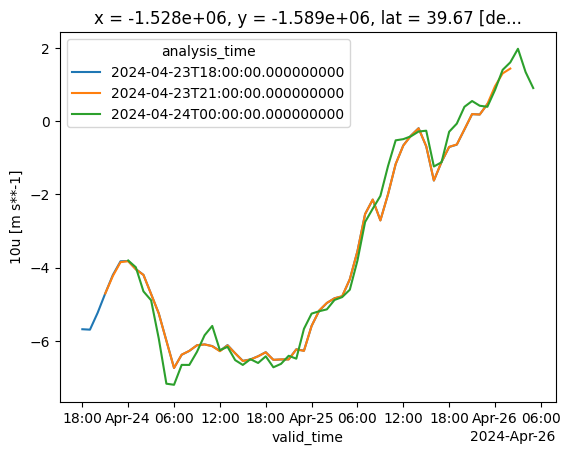

In [20]:
ds["10u"].isel(x=0, y=0).plot(hue="analysis_time")